In [42]:
from utils.frechet import frechetDist
from utils.custom_functions import read_n_rearrange_trajSet, read_pickled_File
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [19]:
#test to see fetchet distance between path A and subsampled path A.
n = [6,11,21,51]
A = np.linspace((0,0),(10,10), 101)
fretchet_list = []
for i in n:
    A2 = np.linspace((0,0),(10,10),i )
    fretchet_list.append(frechetDist(A,A2))
fretchet_list

#Conclusion: Discrete fretchet distance DOES NOT give 0 for the above case.

[1.4142135623730951,
 0.7071067811865476,
 0.2828427124746205,
 0.14142135623730964]

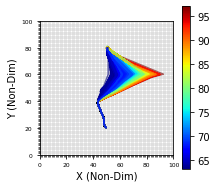

73.1992

In [72]:

def plot_paths_colored_by_EAT(plotFile = None, baseFile = None, savePath_fname = None):
    
    msize = 15
    fsize = 3
    
    # time calculation and state trajectory
    fig = plt.figure(figsize=(fsize, fsize))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    # set grid

    minor_ticks = [i for i in range(101) if i%20!=0]
    major_ticks = [i for i in range(0,120,20)]

    ax.set_xticks(minor_ticks, minor=True)
    ax.set_xticks(major_ticks, minor=False)
    ax.set_yticks(major_ticks, minor=False)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(b= True, which='both', color='#CCCCCC', axis='both',linestyle = '-', alpha = 0.5)
    ax.tick_params(axis='both', which='both', labelsize=6)

    ax.set_xlabel('X (Non-Dim)')
    ax.set_ylabel('Y (Non-Dim)')

#     st_point= g.start_state
#     plt.scatter(g.xs[st_point[1]], g.ys[g.ni - 1 - st_point[0]], marker = 'o', s = msize, color = 'k', zorder = 1e5)
#     plt.scatter(g.xs[g.endpos[1]], g.ys[g.ni - 1 - g.endpos[0]], marker = '*', s = msize*2, color ='k', zorder = 1e5)
    plt.gca().set_aspect('equal', adjustable='box')
    
    #read file
    plot_set = read_pickled_File(plotFile)
    
    #calculate time
    time_list = []
    l = len(plot_set)

    #if baseFile is provided, comparison plot will be made. colorbar will show EAT time differnces.
    if baseFile != None:
        base_traj_set = read_pickled_File(baseFile)
        l_base = len(base_traj_set)
        #sanity check
        if l != l_base:
            print("ERROR: Unfair Comparison. Two lists should have data across same number of realisations")
            return
        
        for i in range(l): 
            if plot_set[i] != None and base_traj_set[i] != None:
                t_plot_set_i = len(plot_set[i][0])
                t_base_set_i = len(base_traj_set[i][0])
                time_list.append(t_plot_set_i - t_base_set_i)
              
    #if baseFile is NOT provided, then the basePlot data will be plotted.
    else:
        for i in range(l):
            if plot_set[i] != None:
                time_list.append(len(plot_set[i][0]))
    
    #set colormap
    jet = cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=np.min(time_list), vmax=np.max(time_list))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    scalarMap._A = []

    #plot plot_set
    for i in range(int(l)):
        if plot_set[i] != None:
            colorval= scalarMap.to_rgba(time_list[i])
            plt.plot(plot_set[i][0], plot_set[i][1], color = colorval, alpha = 0.6)
    plt.colorbar(scalarMap)
    
    if savePath_fname != None:
        plt.savefig(savePath_fname,bbox_inches = "tight", dpi =300)

    plt.show()
                   
    return time_list

plotfile = '/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/7/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp'
time_list = plot_paths_colored_by_EAT(plotFile = plotfile)
(np.mean(time_list))

In [37]:
XX=read_pickled_File('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/5/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp')


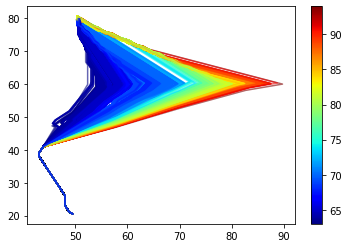

72.3312

In [62]:
time_list = plot_paths_colored_by_EAT('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/5/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp')
(np.mean(time_list))

In [2]:
QL_trajSet =read_n_rearrange_trajSet('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/5/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp')
DP_trajSet =read_n_rearrange_trajSet('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/1/DP/Traj_set_')

len(old_trajSet) = 5000
i=  0
len(P[0])=  69
i=  1
len(P[0])=  67
i=  2
len(P[0])=  67
i=  3
len(P[0])=  69
i=  4
len(P[0])=  68
i=  5
len(P[0])=  89
i=  6
len(P[0])=  66
i=  7
len(P[0])=  67
i=  8
len(P[0])=  81
i=  9
len(P[0])=  65
i=  10
len(P[0])=  79
i=  11
len(P[0])=  85
i=  12
len(P[0])=  68
i=  13
len(P[0])=  78
i=  14
len(P[0])=  85
i=  15
len(P[0])=  87
i=  16
len(P[0])=  80
i=  17
len(P[0])=  65
i=  18
len(P[0])=  68
i=  19
len(P[0])=  67
i=  20
len(P[0])=  69
i=  21
len(P[0])=  70
i=  22
len(P[0])=  69
i=  23
len(P[0])=  69
i=  24
len(P[0])=  70
i=  25
len(P[0])=  69
i=  26
len(P[0])=  80
i=  27
len(P[0])=  68
i=  28
len(P[0])=  85
i=  29
len(P[0])=  82
i=  30
len(P[0])=  68
i=  31
len(P[0])=  84
i=  32
len(P[0])=  65
i=  33
len(P[0])=  65
i=  34
len(P[0])=  67
i=  35
len(P[0])=  82
i=  36
len(P[0])=  69
i=  37
len(P[0])=  69
i=  38
len(P[0])=  69
i=  39
len(P[0])=  79
i=  40
len(P[0])=  80
i=  41
len(P[0])=  82
i=  42
len(P[0])=  67
i=  43
len(P[0])=  67
i=  44
len(P[0])= 

len(P[0])=  85
i=  658
len(P[0])=  81
i=  659
len(P[0])=  66
i=  660
len(P[0])=  65
i=  661
len(P[0])=  70
i=  662
len(P[0])=  85
i=  663
len(P[0])=  81
i=  664
len(P[0])=  67
i=  665
len(P[0])=  68
i=  666
len(P[0])=  69
i=  667
len(P[0])=  65
i=  668
len(P[0])=  67
i=  669
len(P[0])=  64
i=  670
len(P[0])=  82
i=  671
len(P[0])=  66
i=  672
len(P[0])=  79
i=  673
len(P[0])=  69
i=  674
len(P[0])=  85
i=  675
len(P[0])=  89
i=  676
len(P[0])=  70
i=  677
len(P[0])=  67
i=  678
len(P[0])=  65
i=  679
len(P[0])=  69
i=  680
len(P[0])=  81
i=  681
len(P[0])=  82
i=  682
len(P[0])=  81
i=  683
len(P[0])=  69
i=  684
len(P[0])=  67
i=  685
len(P[0])=  68
i=  686
len(P[0])=  65
i=  687
len(P[0])=  67
i=  688
len(P[0])=  82
i=  689
len(P[0])=  69
i=  690
len(P[0])=  82
i=  691
len(P[0])=  70
i=  692
len(P[0])=  79
i=  693
len(P[0])=  69
i=  694
len(P[0])=  79
i=  695
len(P[0])=  66
i=  696
len(P[0])=  85
i=  697
len(P[0])=  67
i=  698
len(P[0])=  83
i=  699
len(P[0])=  88
i=  700
len(P[0])= 

len(P[0])=  80
i=  1274
len(P[0])=  82
i=  1275
len(P[0])=  69
i=  1276
len(P[0])=  79
i=  1277
len(P[0])=  64
i=  1278
len(P[0])=  65
i=  1279
len(P[0])=  88
i=  1280
len(P[0])=  68
i=  1281
len(P[0])=  65
i=  1282
len(P[0])=  68
i=  1283
len(P[0])=  81
i=  1284
len(P[0])=  82
i=  1285
len(P[0])=  68
i=  1286
len(P[0])=  68
i=  1287
len(P[0])=  78
i=  1288
len(P[0])=  68
i=  1289
len(P[0])=  68
i=  1290
len(P[0])=  85
i=  1291
len(P[0])=  87
i=  1292
len(P[0])=  82
i=  1293
len(P[0])=  68
i=  1294
len(P[0])=  68
i=  1295
len(P[0])=  83
i=  1296
len(P[0])=  68
i=  1297
len(P[0])=  80
i=  1298
len(P[0])=  69
i=  1299
len(P[0])=  70
i=  1300
len(P[0])=  85
i=  1301
len(P[0])=  70
i=  1302
len(P[0])=  80
i=  1303
len(P[0])=  69
i=  1304
len(P[0])=  66
i=  1305
len(P[0])=  68
i=  1306
len(P[0])=  88
i=  1307
len(P[0])=  87
i=  1308
len(P[0])=  82
i=  1309
len(P[0])=  79
i=  1310
len(P[0])=  67
i=  1311
len(P[0])=  82
i=  1312
len(P[0])=  70
i=  1313
len(P[0])=  84
i=  1314
len(P[0])=  72
i

i=  1831
len(P[0])=  68
i=  1832
len(P[0])=  65
i=  1833
len(P[0])=  82
i=  1834
len(P[0])=  65
i=  1835
len(P[0])=  68
i=  1836
len(P[0])=  67
i=  1837
len(P[0])=  69
i=  1838
len(P[0])=  68
i=  1839
len(P[0])=  65
i=  1840
len(P[0])=  81
i=  1841
len(P[0])=  68
i=  1842
len(P[0])=  64
i=  1843
len(P[0])=  69
i=  1844
len(P[0])=  79
i=  1845
len(P[0])=  65
i=  1846
len(P[0])=  69
i=  1847
len(P[0])=  82
i=  1848
len(P[0])=  78
i=  1849
len(P[0])=  69
i=  1850
len(P[0])=  69
i=  1851
len(P[0])=  70
i=  1852
len(P[0])=  85
i=  1853
len(P[0])=  82
i=  1854
len(P[0])=  69
i=  1855
len(P[0])=  80
i=  1856
len(P[0])=  65
i=  1857
len(P[0])=  69
i=  1858
len(P[0])=  70
i=  1859
len(P[0])=  85
i=  1860
len(P[0])=  70
i=  1861
len(P[0])=  79
i=  1862
len(P[0])=  68
i=  1863
len(P[0])=  69
i=  1864
len(P[0])=  81
i=  1865
len(P[0])=  69
i=  1866
len(P[0])=  81
i=  1867
len(P[0])=  80
i=  1868
len(P[0])=  64
i=  1869
len(P[0])=  68
i=  1870
len(P[0])=  80
i=  1871
len(P[0])=  69
i=  1872
len(P[0

i=  2490
len(P[0])=  81
i=  2491
len(P[0])=  88
i=  2492
len(P[0])=  65
i=  2493
len(P[0])=  70
i=  2494
len(P[0])=  64
i=  2495
len(P[0])=  69
i=  2496
len(P[0])=  80
i=  2497
len(P[0])=  65
i=  2498
len(P[0])=  68
i=  2499
len(P[0])=  81
i=  2500
len(P[0])=  65
i=  2501
len(P[0])=  65
i=  2502
len(P[0])=  69
i=  2503
len(P[0])=  67
i=  2504
len(P[0])=  65
i=  2505
len(P[0])=  79
i=  2506
len(P[0])=  66
i=  2507
len(P[0])=  69
i=  2508
len(P[0])=  85
i=  2509
len(P[0])=  64
i=  2510
len(P[0])=  65
i=  2511
len(P[0])=  88
i=  2512
len(P[0])=  69
i=  2513
len(P[0])=  69
i=  2514
len(P[0])=  69
i=  2515
len(P[0])=  65
i=  2516
len(P[0])=  69
i=  2517
len(P[0])=  87
i=  2518
len(P[0])=  69
i=  2519
len(P[0])=  84
i=  2520
len(P[0])=  68
i=  2521
len(P[0])=  69
i=  2522
len(P[0])=  81
i=  2523
len(P[0])=  68
i=  2524
len(P[0])=  69
i=  2525
len(P[0])=  82
i=  2526
len(P[0])=  84
i=  2527
len(P[0])=  68
i=  2528
len(P[0])=  81
i=  2529
len(P[0])=  68
i=  2530
len(P[0])=  69
i=  2531
len(P[0

i=  3018
len(P[0])=  65
i=  3019
len(P[0])=  64
i=  3020
len(P[0])=  69
i=  3021
len(P[0])=  84
i=  3022
len(P[0])=  63
i=  3023
len(P[0])=  65
i=  3024
len(P[0])=  69
i=  3025
len(P[0])=  82
i=  3026
len(P[0])=  80
i=  3027
len(P[0])=  69
i=  3028
len(P[0])=  82
i=  3029
len(P[0])=  65
i=  3030
len(P[0])=  69
i=  3031
len(P[0])=  79
i=  3032
len(P[0])=  67
i=  3033
len(P[0])=  70
i=  3034
len(P[0])=  69
i=  3035
len(P[0])=  65
i=  3036
len(P[0])=  89
i=  3037
len(P[0])=  65
i=  3038
len(P[0])=  67
i=  3039
len(P[0])=  64
i=  3040
len(P[0])=  67
i=  3041
len(P[0])=  71
i=  3042
len(P[0])=  65
i=  3043
len(P[0])=  65
i=  3044
len(P[0])=  64
i=  3045
len(P[0])=  69
i=  3046
len(P[0])=  81
i=  3047
len(P[0])=  70
i=  3048
len(P[0])=  82
i=  3049
len(P[0])=  69
i=  3050
len(P[0])=  69
i=  3051
len(P[0])=  67
i=  3052
len(P[0])=  65
i=  3053
len(P[0])=  65
i=  3054
len(P[0])=  82
i=  3055
len(P[0])=  69
i=  3056
len(P[0])=  79
i=  3057
len(P[0])=  68
i=  3058
len(P[0])=  64
i=  3059
len(P[0

i=  3663
len(P[0])=  81
i=  3664
len(P[0])=  68
i=  3665
len(P[0])=  80
i=  3666
len(P[0])=  82
i=  3667
len(P[0])=  68
i=  3668
len(P[0])=  81
i=  3669
len(P[0])=  69
i=  3670
len(P[0])=  80
i=  3671
len(P[0])=  78
i=  3672
len(P[0])=  69
i=  3673
len(P[0])=  67
i=  3674
len(P[0])=  64
i=  3675
len(P[0])=  64
i=  3676
len(P[0])=  65
i=  3677
len(P[0])=  88
i=  3678
len(P[0])=  88
i=  3679
len(P[0])=  81
i=  3680
len(P[0])=  69
i=  3681
len(P[0])=  68
i=  3682
len(P[0])=  68
i=  3683
len(P[0])=  84
i=  3684
len(P[0])=  68
i=  3685
len(P[0])=  64
i=  3686
len(P[0])=  68
i=  3687
len(P[0])=  69
i=  3688
len(P[0])=  67
i=  3689
len(P[0])=  85
i=  3690
len(P[0])=  64
i=  3691
len(P[0])=  69
i=  3692
len(P[0])=  67
i=  3693
len(P[0])=  64
i=  3694
len(P[0])=  69
i=  3695
len(P[0])=  65
i=  3696
len(P[0])=  65
i=  3697
len(P[0])=  65
i=  3698
len(P[0])=  69
i=  3699
len(P[0])=  68
i=  3700
len(P[0])=  69
i=  3701
len(P[0])=  67
i=  3702
len(P[0])=  69
i=  3703
len(P[0])=  67
i=  3704
len(P[0

i=  4167
len(P[0])=  66
i=  4168
len(P[0])=  65
i=  4169
len(P[0])=  82
i=  4170
len(P[0])=  65
i=  4171
len(P[0])=  64
i=  4172
len(P[0])=  69
i=  4173
len(P[0])=  85
i=  4174
len(P[0])=  67
i=  4175
len(P[0])=  82
i=  4176
len(P[0])=  82
i=  4177
len(P[0])=  82
i=  4178
len(P[0])=  68
i=  4179
len(P[0])=  87
i=  4180
len(P[0])=  68
i=  4181
len(P[0])=  70
i=  4182
len(P[0])=  80
i=  4183
len(P[0])=  81
i=  4184
len(P[0])=  64
i=  4185
len(P[0])=  66
i=  4186
len(P[0])=  83
i=  4187
len(P[0])=  81
i=  4188
len(P[0])=  82
i=  4189
len(P[0])=  71
i=  4190
len(P[0])=  72
i=  4191
len(P[0])=  65
i=  4192
len(P[0])=  85
i=  4193
len(P[0])=  68
i=  4194
len(P[0])=  82
i=  4195
len(P[0])=  83
i=  4196
len(P[0])=  65
i=  4197
len(P[0])=  69
i=  4198
len(P[0])=  87
i=  4199
len(P[0])=  68
i=  4200
len(P[0])=  70
i=  4201
len(P[0])=  69
i=  4202
len(P[0])=  87
i=  4203
len(P[0])=  78
i=  4204
len(P[0])=  68
i=  4205
len(P[0])=  69
i=  4206
len(P[0])=  69
i=  4207
len(P[0])=  70
i=  4208
len(P[0

i=  4850
len(P[0])=  83
i=  4851
len(P[0])=  68
i=  4852
len(P[0])=  88
i=  4853
len(P[0])=  67
i=  4854
len(P[0])=  65
i=  4855
len(P[0])=  70
i=  4856
len(P[0])=  88
i=  4857
len(P[0])=  69
i=  4858
len(P[0])=  67
i=  4859
len(P[0])=  69
i=  4860
len(P[0])=  67
i=  4861
len(P[0])=  85
i=  4862
len(P[0])=  67
i=  4863
len(P[0])=  80
i=  4864
len(P[0])=  64
i=  4865
len(P[0])=  78
i=  4866
len(P[0])=  65
i=  4867
len(P[0])=  65
i=  4868
len(P[0])=  84
i=  4869
len(P[0])=  65
i=  4870
len(P[0])=  89
i=  4871
len(P[0])=  65
i=  4872
len(P[0])=  65
i=  4873
len(P[0])=  65
i=  4874
len(P[0])=  81
i=  4875
len(P[0])=  65
i=  4876
len(P[0])=  65
i=  4877
len(P[0])=  64
i=  4878
len(P[0])=  68
i=  4879
len(P[0])=  65
i=  4880
len(P[0])=  69
i=  4881
len(P[0])=  69
i=  4882
len(P[0])=  81
i=  4883
len(P[0])=  65
i=  4884
len(P[0])=  67
i=  4885
len(P[0])=  69
i=  4886
len(P[0])=  69
i=  4887
len(P[0])=  65
i=  4888
len(P[0])=  84
i=  4889
len(P[0])=  69
i=  4890
len(P[0])=  69
i=  4891
len(P[0

len(P[0])=  82
i=  423
len(P[0])=  68
i=  424
len(P[0])=  68
i=  425
len(P[0])=  71
i=  426
len(P[0])=  69
i=  427
len(P[0])=  68
i=  428
len(P[0])=  69
i=  429
len(P[0])=  69
i=  430
len(P[0])=  68
i=  431
len(P[0])=  68
i=  432
len(P[0])=  67
i=  433
len(P[0])=  78
i=  434
len(P[0])=  78
i=  435
len(P[0])=  68
i=  436
len(P[0])=  82
i=  437
len(P[0])=  68
i=  438
len(P[0])=  68
i=  439
len(P[0])=  67
i=  440
len(P[0])=  78
i=  441
len(P[0])=  68
i=  442
len(P[0])=  68
i=  443
len(P[0])=  67
i=  444
len(P[0])=  78
i=  445
len(P[0])=  69
i=  446
len(P[0])=  69
i=  447
len(P[0])=  67
i=  448
len(P[0])=  75
i=  449
len(P[0])=  78
i=  450
len(P[0])=  69
i=  451
len(P[0])=  69
i=  452
len(P[0])=  68
i=  453
len(P[0])=  75
i=  454
len(P[0])=  69
i=  455
len(P[0])=  79
i=  456
len(P[0])=  67
i=  457
len(P[0])=  68
i=  458
len(P[0])=  69
i=  459
len(P[0])=  68
i=  460
len(P[0])=  82
i=  461
len(P[0])=  81
i=  462
len(P[0])=  79
i=  463
len(P[0])=  67
i=  464
len(P[0])=  78
i=  465
len(P[0])= 

len(P[0])=  68
i=  1101
len(P[0])=  75
i=  1102
len(P[0])=  68
i=  1103
len(P[0])=  67
i=  1104
len(P[0])=  69
i=  1105
len(P[0])=  79
i=  1106
len(P[0])=  69
i=  1107
len(P[0])=  67
i=  1108
len(P[0])=  68
i=  1109
len(P[0])=  69
i=  1110
len(P[0])=  70
i=  1111
len(P[0])=  69
i=  1112
len(P[0])=  69
i=  1113
len(P[0])=  67
i=  1114
len(P[0])=  67
i=  1115
len(P[0])=  67
i=  1116
len(P[0])=  75
i=  1117
len(P[0])=  67
i=  1118
len(P[0])=  70
i=  1119
len(P[0])=  78
i=  1120
len(P[0])=  68
i=  1121
len(P[0])=  71
i=  1122
len(P[0])=  77
i=  1123
len(P[0])=  69
i=  1124
len(P[0])=  67
i=  1125
len(P[0])=  78
i=  1126
len(P[0])=  69
i=  1127
len(P[0])=  67
i=  1128
len(P[0])=  67
i=  1129
len(P[0])=  68
i=  1130
len(P[0])=  68
i=  1131
len(P[0])=  67
i=  1132
len(P[0])=  67
i=  1133
len(P[0])=  79
i=  1134
len(P[0])=  67
i=  1135
len(P[0])=  67
i=  1136
len(P[0])=  68
i=  1137
len(P[0])=  78
i=  1138
len(P[0])=  76
i=  1139
len(P[0])=  78
i=  1140
len(P[0])=  67
i=  1141
len(P[0])=  68
i

len(P[0])=  67
i=  1735
len(P[0])=  69
i=  1736
len(P[0])=  68
i=  1737
len(P[0])=  81
i=  1738
len(P[0])=  70
i=  1739
len(P[0])=  82
i=  1740
len(P[0])=  75
i=  1741
len(P[0])=  67
i=  1742
len(P[0])=  82
i=  1743
len(P[0])=  81
i=  1744
len(P[0])=  67
i=  1745
len(P[0])=  71
i=  1746
len(P[0])=  78
i=  1747
len(P[0])=  67
i=  1748
len(P[0])=  71
i=  1749
len(P[0])=  70
i=  1750
len(P[0])=  77
i=  1751
len(P[0])=  68
i=  1752
len(P[0])=  67
i=  1753
len(P[0])=  69
i=  1754
len(P[0])=  70
i=  1755
len(P[0])=  86
i=  1756
len(P[0])=  68
i=  1757
len(P[0])=  78
i=  1758
len(P[0])=  67
i=  1759
len(P[0])=  68
i=  1760
len(P[0])=  68
i=  1761
len(P[0])=  82
i=  1762
len(P[0])=  71
i=  1763
len(P[0])=  83
i=  1764
len(P[0])=  68
i=  1765
len(P[0])=  67
i=  1766
len(P[0])=  69
i=  1767
len(P[0])=  78
i=  1768
len(P[0])=  68
i=  1769
len(P[0])=  69
i=  1770
len(P[0])=  70
i=  1771
len(P[0])=  83
i=  1772
len(P[0])=  67
i=  1773
len(P[0])=  69
i=  1774
len(P[0])=  83
i=  1775
len(P[0])=  68
i

i=  2356
len(P[0])=  75
i=  2357
len(P[0])=  68
i=  2358
len(P[0])=  75
i=  2359
len(P[0])=  75
i=  2360
len(P[0])=  69
i=  2361
len(P[0])=  68
i=  2362
len(P[0])=  67
i=  2363
len(P[0])=  79
i=  2364
len(P[0])=  68
i=  2365
len(P[0])=  68
i=  2366
len(P[0])=  71
i=  2367
len(P[0])=  67
i=  2368
len(P[0])=  68
i=  2369
len(P[0])=  69
i=  2370
len(P[0])=  68
i=  2371
len(P[0])=  67
i=  2372
len(P[0])=  70
i=  2373
len(P[0])=  75
i=  2374
len(P[0])=  70
i=  2375
len(P[0])=  78
i=  2376
len(P[0])=  68
i=  2377
len(P[0])=  83
i=  2378
len(P[0])=  68
i=  2379
len(P[0])=  79
i=  2380
len(P[0])=  68
i=  2381
len(P[0])=  71
i=  2382
len(P[0])=  67
i=  2383
len(P[0])=  69
i=  2384
len(P[0])=  68
i=  2385
len(P[0])=  78
i=  2386
len(P[0])=  70
i=  2387
len(P[0])=  67
i=  2388
len(P[0])=  69
i=  2389
len(P[0])=  68
i=  2390
len(P[0])=  67
i=  2391
len(P[0])=  69
i=  2392
len(P[0])=  79
i=  2393
len(P[0])=  68
i=  2394
len(P[0])=  76
i=  2395
len(P[0])=  79
i=  2396
len(P[0])=  68
i=  2397
len(P[0

i=  3041
len(P[0])=  73
i=  3042
len(P[0])=  67
i=  3043
len(P[0])=  68
i=  3044
len(P[0])=  68
i=  3045
len(P[0])=  68
i=  3046
len(P[0])=  78
i=  3047
len(P[0])=  70
i=  3048
len(P[0])=  78
i=  3049
len(P[0])=  70
i=  3050
len(P[0])=  69
i=  3051
len(P[0])=  68
i=  3052
len(P[0])=  68
i=  3053
len(P[0])=  68
i=  3054
len(P[0])=  78
i=  3055
len(P[0])=  68
i=  3056
len(P[0])=  75
i=  3057
len(P[0])=  69
i=  3058
len(P[0])=  68
i=  3059
len(P[0])=  78
i=  3060
len(P[0])=  68
i=  3061
len(P[0])=  77
i=  3062
len(P[0])=  69
i=  3063
len(P[0])=  67
i=  3064
len(P[0])=  78
i=  3065
len(P[0])=  83
i=  3066
len(P[0])=  69
i=  3067
len(P[0])=  70
i=  3068
len(P[0])=  70
i=  3069
len(P[0])=  69
i=  3070
len(P[0])=  68
i=  3071
len(P[0])=  68
i=  3072
len(P[0])=  75
i=  3073
len(P[0])=  75
i=  3074
len(P[0])=  68
i=  3075
len(P[0])=  76
i=  3076
len(P[0])=  68
i=  3077
len(P[0])=  70
i=  3078
len(P[0])=  68
i=  3079
len(P[0])=  76
i=  3080
len(P[0])=  68
i=  3081
len(P[0])=  68
i=  3082
len(P[0

len(P[0])=  78
i=  3662
len(P[0])=  67
i=  3663
len(P[0])=  77
i=  3664
len(P[0])=  69
i=  3665
len(P[0])=  78
i=  3666
len(P[0])=  78
i=  3667
len(P[0])=  68
i=  3668
len(P[0])=  78
i=  3669
len(P[0])=  70
i=  3670
len(P[0])=  78
i=  3671
len(P[0])=  74
i=  3672
len(P[0])=  69
i=  3673
len(P[0])=  68
i=  3674
len(P[0])=  67
i=  3675
len(P[0])=  68
i=  3676
len(P[0])=  68
i=  3677
len(P[0])=  82
i=  3678
len(P[0])=  83
i=  3679
len(P[0])=  77
i=  3680
len(P[0])=  70
i=  3681
len(P[0])=  69
i=  3682
len(P[0])=  68
i=  3683
len(P[0])=  81
i=  3684
len(P[0])=  69
i=  3685
len(P[0])=  67
i=  3686
len(P[0])=  69
i=  3687
len(P[0])=  68
i=  3688
len(P[0])=  68
i=  3689
len(P[0])=  79
i=  3690
len(P[0])=  69
i=  3691
len(P[0])=  70
i=  3692
len(P[0])=  67
i=  3693
len(P[0])=  68
i=  3694
len(P[0])=  68
i=  3695
len(P[0])=  67
i=  3696
len(P[0])=  67
i=  3697
len(P[0])=  68
i=  3698
len(P[0])=  70
i=  3699
len(P[0])=  69
i=  3700
len(P[0])=  70
i=  3701
len(P[0])=  68
i=  3702
len(P[0])=  69
i

i=  4034
len(P[0])=  72
i=  4035
len(P[0])=  69
i=  4036
len(P[0])=  78
i=  4037
len(P[0])=  69
i=  4038
len(P[0])=  69
i=  4039
len(P[0])=  69
i=  4040
len(P[0])=  67
i=  4041
len(P[0])=  68
i=  4042
len(P[0])=  67
i=  4043
len(P[0])=  67
i=  4044
len(P[0])=  82
i=  4045
len(P[0])=  67
i=  4046
len(P[0])=  67
i=  4047
len(P[0])=  67
i=  4048
len(P[0])=  79
i=  4049
len(P[0])=  67
i=  4050
len(P[0])=  69
i=  4051
len(P[0])=  68
i=  4052
len(P[0])=  82
i=  4053
len(P[0])=  78
i=  4054
len(P[0])=  75
i=  4055
len(P[0])=  79
i=  4056
len(P[0])=  68
i=  4057
len(P[0])=  78
i=  4058
len(P[0])=  70
i=  4059
len(P[0])=  75
i=  4060
len(P[0])=  69
i=  4061
len(P[0])=  69
i=  4062
len(P[0])=  70
i=  4063
len(P[0])=  69
i=  4064
len(P[0])=  82
i=  4065
len(P[0])=  68
i=  4066
len(P[0])=  68
i=  4067
len(P[0])=  67
i=  4068
len(P[0])=  78
i=  4069
len(P[0])=  69
i=  4070
len(P[0])=  79
i=  4071
len(P[0])=  68
i=  4072
len(P[0])=  67
i=  4073
len(P[0])=  79
i=  4074
len(P[0])=  83
i=  4075
len(P[0

i=  4667
len(P[0])=  67
i=  4668
len(P[0])=  70
i=  4669
len(P[0])=  69
i=  4670
len(P[0])=  68
i=  4671
len(P[0])=  75
i=  4672
len(P[0])=  67
i=  4673
len(P[0])=  68
i=  4674
len(P[0])=  78
i=  4675
len(P[0])=  72
i=  4676
len(P[0])=  68
i=  4677
len(P[0])=  69
i=  4678
len(P[0])=  67
i=  4679
len(P[0])=  68
i=  4680
len(P[0])=  78
i=  4681
len(P[0])=  75
i=  4682
len(P[0])=  78
i=  4683
len(P[0])=  78
i=  4684
len(P[0])=  67
i=  4685
len(P[0])=  68
i=  4686
len(P[0])=  68
i=  4687
len(P[0])=  76
i=  4688
len(P[0])=  67
i=  4689
len(P[0])=  69
i=  4690
len(P[0])=  70
i=  4691
len(P[0])=  68
i=  4692
len(P[0])=  68
i=  4693
len(P[0])=  75
i=  4694
len(P[0])=  79
i=  4695
len(P[0])=  82
i=  4696
len(P[0])=  68
i=  4697
len(P[0])=  68
i=  4698
len(P[0])=  78
i=  4699
len(P[0])=  69
i=  4700
len(P[0])=  69
i=  4701
len(P[0])=  69
i=  4702
len(P[0])=  67
i=  4703
len(P[0])=  79
i=  4704
len(P[0])=  68
i=  4705
len(P[0])=  67
i=  4706
len(P[0])=  68
i=  4707
len(P[0])=  82
i=  4708
len(P[0

In [4]:
# check across indices in same trajSet- check OK
Q0 = QL_trajSet[0]
Q1 = QL_trajSet[8]
for i in range(len(Q0)):
    print(Q0[i]==Q1[i])


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [17]:
# check same trajectories in QL and DP
id = 8
Q = QL_trajSet[id]
D = DP_trajSet[id]
print((len(Q), len(D)))
l = np.min(((len(Q), len(D))))
for i in range(l):
    print(Q[i]==D[i])

(81, 77)
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [19]:
print(QL_trajSet[8])
print(DP_trajSet[8])
# frechetDist(QL_trajSet[8], DP_trajSet[8])

[[49.5, 20.5], [48.792893218813454, 21.20710678118655], [48.41020978644836, 22.130986313697836], [48.02752635408327, 23.054865846209122], [48.02752635408327, 24.054865846209122], [48.02752635408327, 25.054865846209122], [48.02752635408327, 26.054865846209122], [47.64484292171818, 26.978745378720408], [47.26215948935309, 27.902624911231694], [46.879476056988, 28.82650444374298], [46.496792624622906, 29.750383976254266], [46.114109192257814, 30.674263508765552], [45.73142575989272, 31.59814304127684], [45.34874232752763, 32.52202257378813], [44.96605889516254, 33.445902106299414], [44.58337546279745, 34.3697816388107], [44.20069203043236, 35.293661171321986], [43.818008598067266, 36.21754070383327], [43.435325165702174, 37.14142023634456], [43.05264173333708, 38.065299768855844], [43.05264173333708, 39.065299768855844], [43.435325165702174, 39.98917930136713], [43.818008598067266, 40.91305883387842], [45.75204495921583, 41.91305883387842], [47.686081320364394, 42.91305883387842], [49.620

10.616618887761238

In [ ]:
print(len(QL_trajSet))
fdists=[]
for i in range(100):
    print(i)
    fdists.append(frechetDist(QL_trajSet[i], DP_trajSet[i]))

print(fdists)

In [ ]:
print(np.max(fdists))
print(np.min(fdists))
QL_old_traj_set = read_pickled_File('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/5/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp')
DP_old_traj_set =read_pickled_File('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/1/DP/Traj_set_')

In [ ]:
# def read_n_rearrange_trajSet(filename):
#     old_trajSet =read_pickled_File(filename)
#     new_traj_list = []
#     for i in range(len(old_trajSet)):
#         P = old_trajSet[i]
#         Pnew=[]
#         for j in range(len(P[0])):
#             Pnew.append([P[0][j],P[1][j]])
#         new_traj_list.append(Pnew)
#     return new_traj_list


for i in range(5):
    plt.plot(QL_old_traj_set[i][0], QL_old_traj_set[i][1], color ='k')
    plt.plot(DP_old_traj_set[i][0], DP_old_traj_set[i][1], color = 'b')

In [ ]:
new_traj_set = read_n_rearrange_trajSet('/Users/rohit/workspace/ROHIT/DDDAS_2d_Highway/Experiments/5/QL/dt_size_5000/ALPHA_0.5/eps_0_0.25/Trajectories_after_exp')



In [ ]:
# frechetDist(new_traj_set[1], new_traj_set[1])
QL_trajSet[1]